# CNN (Convolution Neural Network)

# Step1:Prepare a dataset of images.

An image here is just like a matrix of pixel values.
Image here is 3D - length,width and depth. And here depth represents channels.(3 for RGB)
Here we are doing supervised learning i.e.Mapping between input data and output label and that is done by Back Propagation.
Back Propagation is done to update weights.

Great training datasets are MNIST,CIFAR10 and CoCo.
But we will use MNIST here.
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

In [7]:
#Import numpy 
#The method seed() sets the integer starting value used in generating random numbers. 
#Call this function before calling any other random module function.
import numpy as np
np.random.seed(56)  # for reproducibility

# Step2:Convolution


# Step3:Pooling

# Step4:Normalization

# Step5:Regularization

# Step6:Probability Conversion

# Step7:Choose maximum probable value.

In [8]:
from keras.models import Sequential

Using TensorFlow backend.


In [9]:
from keras.layers import Dense, Dropout,Activation, Flatten

#Dense layer:
It is the fully connected layer in our neural network.

Dropout layer:

Dropout is a technique that randomly ignoring nodes. It is useful because it prevents inter-dependencies from emerging between nodes (I.e. nodes do not learn functions which rely on input values from another node), this allows the network to learn more a more robust relationship. Implementing dropout has much the same affect as taking the average from a committee of networks, however the cost is significantly less in both time and storage required.


Activation layer:

After each conv layer, it is convention to apply a nonlinear layer (or activation layer) immediately afterward.The purpose of this layer is to introduce nonlinearity to a system that basically has just been computing linear operations during the conv layers (just element wise multiplications and summations). It also helps to alleviate the vanishing gradient problem, which is the issue where the lower layers of the network train very slowly because the gradient decreases exponentially through the layers

Flatten layer:

We need to convert the output of the convolutional part of the CNN into a 1D feature vector, to be used by the ANN part of it. This operation is called flattening. It gets the output of the convolutional layers, flattens all its structure to create a single long feature vector to be used by the dense layer for the final classification.

Now we'll import the CNN layers from Keras. These are the convolutional layers that will help us efficiently train on image data. We will also import some utilities. This will help us transform our data later:

In [10]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [11]:
batch_size= 120
classes = 10
epoches = 15
img_rows,img_cols=28,28
filters=40
pool_size=(3,3)
kernel_size=(3,3)

In [12]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [13]:
X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)
input_shape=(img_cols, img_rows, 1)

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [15]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [16]:
Y_train = np_utils.to_categorical(y_train, classes)
Y_test = np_utils.to_categorical(y_test,classes)

In [64]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))

In [67]:
model.add(Activation('relu'))
model.add(Convolution2D(filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(classes))
model.add(Activation('softmax'))

# Complie the model

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (3, 3))`
  


#The first 3 parameters correspond to the number of convolution filters to use, the number of rows in each convolution kernel, and the number of columns in each convolution kernel, respectively.

Now add some more layers to net.

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_25 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
activation_26 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 40)        11560     
_________________________________________________________________
activation_27 (Activation)   (None, 24, 24, 40)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 40)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 8, 40)          0         
__________

# Fit model on training data:

In [71]:
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=epoches,
           validation_data=(X_test, Y_test))

/usr/local/lib/python3.5/dist-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 392s 7ms/step - loss: 0.2941 - acc: 0.9091 - val_loss: 0.0580 - val_acc: 0.9822
Epoch 2/15
60000/60000 [==============================] - 541s 9ms/step - loss: 0.1031 - acc: 0.9696 - val_loss: 0.0423 - val_acc: 0.9860
Epoch 3/15
60000/60000 [==============================] - 548s 9ms/step - loss: 0.0769 - acc: 0.9776 - val_loss: 0.0359 - val_acc: 0.9881
Epoch 4/15
60000/60000 [==============================] - 386s 6ms/step - loss: 0.0645 - acc: 0.9810 - val_loss: 0.0330 - val_acc: 0.9889
Epoch 5/15
60000/60000 [==============================] - 369s 6ms/step - loss: 0.0570 - acc: 0.9823 - val_loss: 0.0316 - val_acc: 0.9887
Epoch 6/15
60000/60000 [==============================] - 370s 6ms/step - loss: 0.0512 - acc: 0.9849 - val_loss: 0.0266 - val_acc: 0.9908
Epoch 7/15
60000/60000 [==============================] - 362s 6ms/step - loss: 0.0463 - acc: 0.9858 - val_loss: 0.0310 - 

In [73]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 14s 1ms/step
Test score: 0.0272030745179989
Test accuracy: 0.9912


# Plot the graphs:

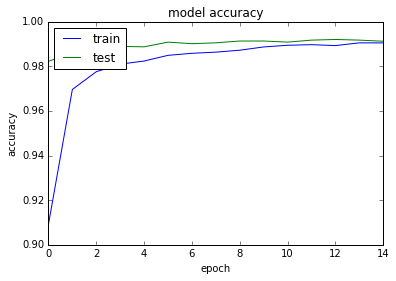

In [74]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()